In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

-----------------------------------------
#### Kullback-Leibler Divergence - KL divergence
--------------------------------------

- named for the two authors of the method __Solomon Kullback__ and __Richard Leibler__, and is sometimes referred to as “relative entropy.”

- quantifies how much one `probability distribution` differs from another `probability distribution`.

- Classically, in Bayesian theory, there is some true distribution $P(X)$; we'd like to estimate with an approximate distribution $Q(X)$. 

- In this context, the KL divergence measures the __distance__ from the `approximate distribution Q` to the `true distribution P`.

- Mathematically, consider two probability distributions $P,Q$ on some space $ \mathcal{X}$. The __Kullback-Leibler divergence__ from $Q$ to $P$ (written as $D_{KL}(P \| Q)$ ))

- __KL divergence__ can be calculated as 

    - the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.
    
    
$$\begin{equation}
\large D_{KL}(P \| Q) = \sum p(X) \log \frac {p(X)} {q(X)} 
\end{equation}$$
    
$$\begin{equation}
\large D_{KL}(P \| Q) = \sum p(X) \log [ p(X) \div q(X) ]
\end{equation}$$

#### intuition 

- for the KL divergence score is that 
    - when the probability for an event from P is large, but the probability for the same event in Q is small, there is a __large divergence__. 
    
    - When the probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.


#### Properties of KL Divergence

- The KL Divergence is not symmetric: that is $D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$

- The KL Divergence can take on values in $[0,\infty]$. Particularly, if $P$ and $Q$ are the exact same distribution ($P \stackrel{a.e.}{=} Q$ then $D_{KL}(P \| Q) = 0$ and $D_{KL}(Q \| P) = 0$

#### KL Distance

- __KL divergence__ is sometimes called the __KL distance__ (or a `probabilistic distance model`), as it represents a `__distance__` between two distributions. 

- However, it isn’t a traditional metric (i.e. it isn’t a unit of length). 
    - Firstly, it __isn’t symmetric__ in p and q; the distance from P to Q is different from the distance from Q to P. 
        $$D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$$
        
    - it doesn’t satisfy the triangle inequality (Manning & Schütze, 1999).


#### Example 1

In [2]:
# define distributions
events = ['red', 'green', 'blue']

p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

In [3]:
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))

P=1.000 Q=1.000


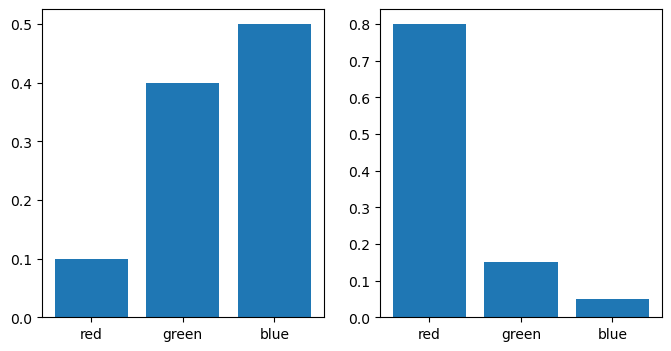

In [4]:
# plot of distributions
from matplotlib import pyplot
pyplot.figure(figsize=(8, 4))

# plot first distribution
pyplot.subplot(1,2,1)
pyplot.bar(events, p)

# plot second distribution
pyplot.subplot(1,2,2)
pyplot.bar(events, q);

the distributions are different.

In [5]:
import numpy as np

In [6]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * np.log2(p[i]/q[i]) for i in range(len(p)))

In [7]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)

# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


#### using scipy KL-divergence

In [9]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr

# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

# calculate (P || Q)
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 1.336 nats
KL(Q || P): 1.401 nats


#### Example 2

Lets say we have a bag of full of __red__ and __blue__ balls. 

Now, lets assume that the bag has __10 red balls and 15 blue__ balls. 

So that means it has $\frac{10}{10 + 15}$ or 40% red balls and 60% blue balls. 

If we pulled 1 ball from this bag, there is a 40% chance, that it is a __red__ ball. 

Similarly, the probability of drawing a __blue__ ball is 60% or 0.6. 

In probability parlance, the ball we are drawing is a the random variable. 

Because the ball can take only limited set of colors (2 in this case), we say that it has discrete states. 

In [10]:
import numpy as np
 
np.random.seed(8)
 
def redball_blueball(count=1):

    bag = np.random.random(count) 
    
    # now lets convert this bag into labels
    # a value of 0.4 or below is a red ball
    # value above 0.4 is a blue ball
    return ['red' if (x <= 0.4) else 'blue' for x in bag.tolist()]

In [11]:
redball_blueball(10)

['blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue']

In [13]:
from collections import Counter

In [14]:
np.random.seed(8) #reset our random number generator
 
bag_10    = redball_blueball(10)
bag_100   = redball_blueball(100)
bag_1000  = redball_blueball(1000)
bag_10000 = redball_blueball(10000)
 
print (Counter(bag_10))
print (Counter(bag_100))
print (Counter(bag_1000))
print (Counter(bag_1000))

Counter({'blue': 8, 'red': 2})
Counter({'blue': 65, 'red': 35})
Counter({'blue': 598, 'red': 402})
Counter({'blue': 598, 'red': 402})


So, the ratio of red to blue is 20%: 80%, 35%:65%, 40.2%:59.8% and 40.63:59.37%. 

Larger number of balls drawn make the distribution gravitate to the desired distribution. 

But it is not exact. 

Ideally, we want to a ratio of 40%:60%. 

In [17]:
import pandas as pd
import random

In [18]:
def rand_bag_gen(n_times = 10):
    
    bag_arr = []
    
    for iter in range(n_times):
        n_items_to_gen = random.randint(6, 999) 
        
        bag = Counter(redball_blueball(n_items_to_gen))
        
        bag_arr.append(bag)
        
        df = pd.DataFrame(bag_arr)
        
    df['red_prob']  = df['red'] /(df['red'] + df['blue'])
    df['blue_prob'] = df['blue']/(df['red'] + df['blue'])        
    
    return df

In [19]:
df_kl = rand_bag_gen(20)
df_kl.head()

,blue,red,red_prob,blue_prob
0,24,16,0.400000,0.600000
1,232,155,0.400517,0.599483
2,351,237,0.403061,0.596939
3,576,366,0.388535,0.611465
4,603,381,0.387195,0.612805


#### how do we use these probability dist info?

Suppose we have classification task
- classify images into cats and not cats. 
- possibilities correspond to the __red__ ball and __blue__ ball scenario. 
 
- To judge the accuracy of effectiveness of our machine learning algorithm, you need to measure it’s predictions vs that actual number. 
- This corresponds to the numbers our random number code generates above vs the expected answer, which was 40:60. 
- In machine learning algorithms, the objective is to 
    - minimize this difference. (referred to as the loss or error). 
    - This is what __KL divergence__ provides. 
    - In the case of red/blue balls, 
        - the actual distribution is {0.4, 0.6}. 
        - candidate distributions in {.2, 0.8}, {.35, .65}, {.402, .598}, {.4063, .5937}. 
        - We want to evaluate each one of them as to how similar they are to the actual distribution. 
        - Just by looking at the values, we can say that the third pair is probably the closest, while the first one is the farthest.

In [20]:
from scipy import stats
from scipy.special import rel_entr

In [21]:
stats.entropy(pk=[0.2, 0.8], qk=[0.4, 0.6])

0.09151622184943578

In [22]:
def kl_div_stats_entr(est, act):
    
    kl = stats.entropy(pk=est, qk=act)

    return kl

def kl_div_rel_entr(est, act):
    
    kl = sum(rel_entr(est, act))

    return kl

# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * np.log2(p[i]/q[i]) for i in range(len(p)))

In [63]:
df_kl['kl_div_stats_entr'] = df_kl.apply(lambda x: kl_div_stats_entr([x['red_prob'], x['blue_prob']], [0.4, 0.6]), axis=1)
df_kl['kl_div_rel_entr']   = df_kl.apply(lambda x: kl_div_rel_entr  ([x['red_prob'], x['blue_prob']], [0.4, 0.6]), axis=1)
df_kl['kl_div_custom']     = df_kl.apply(lambda x: kl_divergence    ([x['red_prob'], x['blue_prob']], [0.4, 0.6]), axis=1)
df_kl

,blue,red,red_prob,blue_prob,kl_div,kl_div_stats_entr,kl_div_rel_entr,kl_div_custom
0,187,127,0.404459,0.595541,0.000041,0.000041,0.000041,0.000060
1,567,393,0.409375,0.590625,0.000183,0.000183,0.000183,0.000263
2,177,124,0.411960,0.588040,0.000297,0.000297,0.000297,0.000429
3,518,331,0.389870,0.610130,0.000214,0.000214,0.000214,0.000309
4,185,134,0.420063,0.579937,0.000834,0.000834,0.000834,0.001203
5,441,278,0.386648,0.613352,0.000373,0.000373,0.000373,0.000538
6,611,387,0.387776,0.612224,0.000312,0.000312,0.000312,0.000451
7,270,180,0.400000,0.600000,0.000000,0.000000,0.000000,0.000000
8,454,298,0.396277,0.603723,0.000029,0.000029,0.000029,0.000042
9,108,67,0.382857,0.617143,0.000615,0.000615,0.000615,0.000888


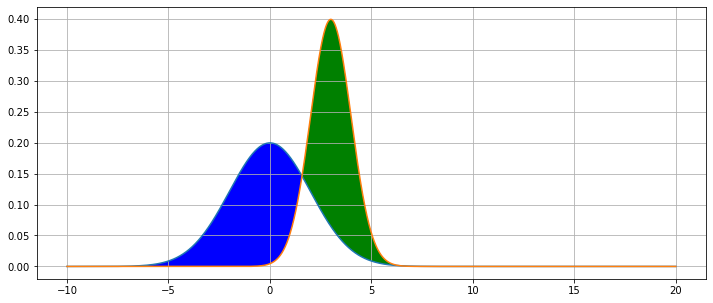

In [23]:
import matplotlib.pyplot as plt

x_axis = np.arange(-10, 20, 0.001)

# Mean = 0, SD = 2.
dist_a = stats.norm.pdf(x_axis, 0, 2)

# Mean = 1, SD = 2
dist_b = stats.norm.pdf(x_axis, 3, 1)

plt.figure(figsize=(12, 5))
plt.plot(x_axis, dist_a)
plt.plot(x_axis, dist_b)

plt.fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue',  interpolate=True)
plt.grid();

In [82]:
kl_divergence(dist_a, dist_b), kl_divergence(dist_b, dist_a)

(7656.139132987218, 2082.02128066789)

## Forward and Reverse KL
- Scenario
- There is some true distribution $P(X)$ that we're trying to estimate with our approximate distribution $Q_θ(X)$
- $Q$ is the distribution that we get to control.

- the KL divergence is not a symmetric measure (i.e. that $D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$
- we have a choice between 2 potential objectives to optimize.

    - Minimizing the __forward KL__ : $\arg\min_{\theta} D_{KL}(P\|Q_\theta)$
    - Minimizing the __reverse KL__ : $\arg\min_{\theta} D_{KL}(Q_\theta\|P)$

As it turns out, the two different objectives actually cause different types of approximations. 

We'll investigate in the following setting: $P(X)$ is the bimodal distribution below. We'll try to approximate this with a normal distribution $Q(X) = \mathcal{N}(\mu, \sigma^2)$

In [83]:
from IPython.display import Image

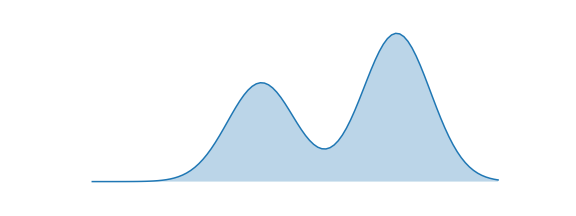

In [85]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\kl-00.png', width=600)

#### Forward KL: Mean-Seeking Behaviour
Let's consider optimizing the forward KL objective with respect to

$$\begin{align*}
\arg\min_{\theta}D_{KL}(P \| Q) &= \arg\min_{\theta} \mathbb{E}_{x \sim P}[-\log Q_\theta(X)] - \mathcal{H}(P(X))\\
&= \arg\min_{\theta} \mathbb{E}_{x \sim P}[-\log Q_\theta(X)]\\
&= \arg\max_{\theta} \mathbb{E}_{x \sim P}[\log Q_\theta(X)]
\end{align*}$$